In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [15]:
N=50
D=50

X=(np.random.random((N,D))-0.5)*10
true_w=np.array([1,0.5,-0.5]+[0]*(D-3))
Y=X.dot(true_w)+np.random.rand(N)*0.5    #for every indice add the separate noise

In [13]:
np.shape(X)

(50, 50)

In [14]:
np.shape(true_w)

(50,)

In [16]:
true_w

array([ 1. ,  0.5, -0.5,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,
        0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,
        0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,
        0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,
        0. ,  0. ,  0. ,  0. ,  0. ,  0. ])

In [19]:
np.random.rand(N)*0.5


array([0.00827909, 0.06871574, 0.25793852, 0.06370136, 0.16386216,
       0.04493253, 0.27888073, 0.0609332 , 0.07515482, 0.21439788,
       0.43167133, 0.04582272, 0.04976775, 0.44366707, 0.02316563,
       0.1352668 , 0.4990701 , 0.43708145, 0.12298776, 0.14897359,
       0.47292007, 0.07565978, 0.37753097, 0.06928357, 0.27139026,
       0.13773287, 0.4430452 , 0.18879698, 0.26793254, 0.10282309,
       0.40409308, 0.48362726, 0.24227554, 0.08414764, 0.20283526,
       0.30834063, 0.27742889, 0.11281888, 0.08339521, 0.24946995,
       0.07769548, 0.41684969, 0.27424616, 0.07549207, 0.31389694,
       0.11769397, 0.45773246, 0.05473711, 0.2873248 , 0.41502465])

In [24]:
sigma_=np.sqrt(1/D)
w_alpha=sigma_*(np.random.rand(D))+0.0

In [25]:
w_alpha

array([0.0030187 , 0.03816802, 0.12850131, 0.00085838, 0.11405882,
       0.05282314, 0.01448297, 0.05429666, 0.04591838, 0.00017793,
       0.01993657, 0.08764814, 0.13554819, 0.13020876, 0.0187326 ,
       0.0503196 , 0.1237914 , 0.11753355, 0.1331321 , 0.10463716,
       0.14092693, 0.13369323, 0.08385944, 0.03620336, 0.13635485,
       0.0670145 , 0.04249114, 0.12147941, 0.11956553, 0.077707  ,
       0.02044713, 0.01957435, 0.13419238, 0.09838141, 0.01638304,
       0.12625651, 0.01893931, 0.08427672, 0.00320054, 0.0100877 ,
       0.07124993, 0.03236045, 0.13259898, 0.02949581, 0.03003414,
       0.01339436, 0.02730172, 0.0685109 , 0.05716536, 0.05588346])

In [75]:
alpha_=0.001      #[[0.001,0.001,0.001]]
#alpha_=[0.2,0.1,0.01]   #did not make a differnece at high iterations, get to coss=0.0006720300664445527
costs=[]
costs_L1=[]
itr=[]
itr_L1=[]

sigma_=np.sqrt(1/D)
w_alpha=sigma_*(np.random.rand(D))+0.0
w_backup=w_alpha   # to have same seed initilization

for i in range(100):
    
    y_new=X.dot(w_alpha)
    delta=(y_new-Y)
    w_alpha=w_alpha-alpha_*(X.T.dot(delta))
    mse=(delta.dot(delta))/N
    costs.append(mse)
    itr.append(i)
    #print(w_alpha)
w_1=w_alpha    
R_squared=1-(((Y-y_new).dot(Y-y_new))/((Y-Y.mean()).dot(Y-Y.mean())))    
print('No L1 term R^2',R_squared)

w_alpha=w_backup   
L1=10.0

for i in range(100):
    
    y_new=X.dot(w_alpha)
    delta=(y_new-Y)
    w_alpha=w_alpha-alpha_*((X.T.dot(delta))+L1*(np.sign(w_alpha)))
    mse=(delta.dot(delta))/N
    costs_L1.append(mse)
    itr_L1.append(i)
    #print(w_alpha)   
w_2=w_alpha
R_squared=1-(((Y-y_new).dot(Y-y_new))/((Y-Y.mean()).dot(Y-Y.mean())))    
print('L1=10',R_squared)

No L1 term R^2 0.9998462161379397
L1=10 0.9595083742757552


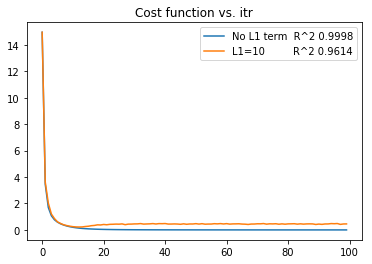

In [76]:
fig=plt.figure()
plt.plot(itr,costs,label='No L1 term  R^2 0.9998')
plt.plot(itr_L1,costs_L1,label='L1=10         R^2 0.9614')
plt.legend()
plt.title('Cost function vs. itr')
#plt.xlim(-1,50)
plt.show()

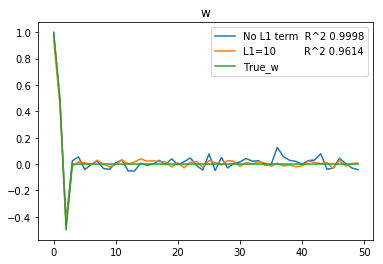

In [77]:
fig=plt.figure()
plt.plot(w_1,label='No L1 term  R^2 0.9998')
plt.plot(w_2,label='L1=10         R^2 0.9614')
plt.plot(true_w,label='True_w')
plt.legend()
plt.title('w')
#plt.xlim(-1,50)
plt.show()    #more noise in w with L1=0 and further than true_w